# **loads relevant plug ins**

In [ ]:
import requests
import json
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# **Mounts the drive to access the data and reads its usng csv reader**


In [ ]:
Lot_info = []

from google.colab import drive
drive.mount('/content/drive')

with open("/content/drive/My Drive/properties/Lots/Lot_Analysis.csv","r") as myfile:

  csvReader = csv.reader(myfile, delimiter=",", quotechar='"')

  next(csvReader)

  for row in csvReader:
    Lot_info.append(row)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Sets up the data in panda format**

In [ ]:

Property_info_pandas = pd.read_csv("/content/drive/My Drive/properties/Lots/Lot_Analysis.csv")

Property_info_pandas

,Category,Property Name #1,Index #,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Budget,40000,0,NaN,Elementary School,7.0
1,Price,35000,1,NaN,Middle School,5.0
2,Floodplain,no,2,NaN,Highschool,3.0
3,Water Main in Abutting Street,yes,3,NaN,NaN,NaN
4,Sewer Main in Abutting Street,yes,4,NaN,NaN,NaN
5,"Highway or Railroad Within 1,000 ft?",no,5,NaN,NaN,NaN
6,Area,4500,6,NaN,NaN,NaN
7,Length,90,7,NaN,NaN,NaN
8,Width,50,8,NaN,NaN,NaN
9,"Great Schools Rating (1=below avg, 10=above)",5,9,NaN,NaN,NaN


#**Assigns variables to the property data and converts them into float format for later use**

In [ ]:
#extracts relevant data from the csv file using indexing an converts them into a float type variable

budget= Lot_info[0][1]
budget_1 = float(budget)

price = Lot_info[1][1]
price_1 = float(price)

floodplain = Lot_info[2][1]
floodplain_1 = str(floodplain)

water = Lot_info[3][1]
water_1 = (water)

sewer = Lot_info[4][1]
sewer_1 = str(sewer)

highway = Lot_info[5][1]
highway_1 = str(highway)

size = Lot_info[6][1]
size_1 = float(size)

length = Lot_info[7][1]
length_1 = float(length)

Width =  Lot_info[8][1]
Width_1 = float(Width)

Schools = Lot_info[9][1]
Schools_1 = float(Schools)

TIRZ = Lot_info[10][1]
TIRZ_1 = str(TIRZ)

NSP = Lot_info[11][1]
NSP_1 = str(NSP)

crime = Lot_info[12][1]
crime_1= float(crime)

zoning = Lot_info[13][1]
zoning_1 = str(zoning)

historic = Lot_info[14][1]
historic_1 = str(historic)

slope = Lot_info[15][1]
slope_1 = str(slope)

PCI = Lot_info[16][1]
PCI_1 = float(PCI)

plat_year = Lot_info[17][1]
plat_year_1 = float(plat_year)

sidewalk = Lot_info[18][1]
sidewalk_1 = str(sidewalk)

ex_structures = Lot_info[19][1]
ex_structures_1 = str(ex_structures)

driveway = Lot_info[20][1]
driveway_1 = str(driveway)

trees = Lot_info[21][1]
trees_1 = str(trees)

neighbohood_quality = Lot_info[22][1]
neighbohood_quality_1 = float(neighbohood_quality)

Add_Fees = Lot_info[23][1]
Add_Fees_1 = float(Add_Fees)



price_per_square_foot_1 = float(price_1/size_1)



#**Default Settings Configuration**

In [ ]:
from numpy import add
default= input("Activate default settings? yes or no? (y for yes, n for no) ")

if default == "yes" or "y" or "Y":
  PPS_input_top = 200
  PPS_input_midHigh = 150
  PPS_input_midLow = 120
  PPS_input_Low = 100

  Size_input_top = 5000
  Size_input_midhigh = 3500
  Size_input_midlLow = 3000
  Size_input_Low = 2000

  PCI_top = 86
  PCI_midHigh = 75
  PCI_midLow = 60
  PCI_Low =  45

  zoning_Top = ("r-4" or "R-4" or "r4" or "R4")
  zoning_MidHigh = ("rm-4" or "RM-4" or "rm4" or "RM4" or "r-5" or "R-5" or "R5" or "r5")
  zoning_MidLow = ("r-6" or "R-6" or "R6" or "r6")
  zoningmax = [zoning_Top,zoning_MidHigh,zoning_MidLow]
  zoning_Low = not zoningmax[0:3]

  budget_top = budget_1*1.25
  budget_midHigh = budget_1*1.15
  budget_midLow = budget_1*.85
  budget_low= budget_1*.7

  slope_top = ("no" or "none" or "flat")
  slope_mid = ("slight" or "somewhat" or "Somewhat" or "kinda")
  slope_bad = ("yes" or "extreme" or "sloped")


  Add_Fees_top = 12000
  Add_Fees_midHigh = 8000
  Add_Fees_midLow = 4000
  Add_Fees_Low = 0


  NSP_weight = 1.2
  TIRZ_weight = 1.2
  trees_weight =.7
  plat_weight = 1.6
  sidewalk_weight = 1.2
  driveway_weight = 1.3
  highway_weight = .3
  structures_weight = .5

  PPS_weight = 1.5
  size_weight = 1.4
  price_weight = 1
  neighborhood_score_weight = 1.4
  school_weight = .7
  crime_weight = 1
  zoning_weight = .5
  slope_weight = .7
  PCI_weight = .7
  add_cost_weight = 1.7



else:

  NSP_weight = int(input("insert NSP weight importance: "))
  TIRZ_weight = int(input("insert TIRZ weight importance: "))
  trees_weight = int(input("insert trees weight importance: "))
  plat_weight = int(input("insert plat weight importance: "))
  sidewalk_weight = int(input("insert sidewalk weight importance: "))
  driveway_weight = int(input("insert driveway weight importance: "))
  highway_weight = int(input("insert highway weight importance: "))
  structures_weight = int(input("insert structures weight importance: "))

  PPS_weight = int(input("insert price per square foot weight importance: "))
  size_weight = int(input("insert size weight importance: "))
  price_weight = int(input("insert price weight importance: "))
  neighborhood_score_weight = int(input("insert neighborhood quality weight importance: "))
  school_weight = int(input("insert school weight importance: "))
  crime_weight = int(input("insert crime weight importance: "))
  zoning_weight = int(input("insert zoning weight importance: "))
  slope_weight = int(input("insert slope weight importance: "))
  PCI_weight = int(input("insert PCI weight importance: "))
  add_cost_weight = int(input("insert additional costs weight importance: "))

  PPS_input_top = int(input("insert high end of Price per Square foot: "))
  PPS_input_midHigh = int(input("insert mid-high end of Price per Square foot: "))
  PPS_input_midLow = int(input("insert mid-low end of Price per Square foot: "))
  PPS_input_Low = int(input("insert low end of Price per Square foot: "))

  Size_input_top = int(input("insert high end of size in square feet: "))
  Size_input_midhigh = int(input("insert mid high end of size in square feet: "))
  Size_input_midlLow = int(input("insert mid low end of size in square feet: "))
  Size_input_Low = int(input("insert low end of size in square feet: "))

  budget_top = (int(input("insert high end of budget price: ")))
  budget_midHigh = (int(input("insert mid high end of budget price: ")))
  budget_midLow = (int(input("insert mid low end of budget price: ")))
  budget_low = (int(input("insert low end of budget price: ")))

  avg_home_top = (int(input("insert high end of average home price: ")))
  avg_home_midHigh = (int(input("insert mid high end of average home price: ")))
  avg_home_midLow = (int(input("insert mid low end of average home price: ")))
  avg_home_Low = (int(input("insert low end of average home price: ")))

  PCI_top = (float(input("insert high end of PCI: ")))
  PCI_midHigh = (float(input("insert mid high end of PCI: ")))
  PCI_midLow = (float(input("insert mid low end of PCI: ")))
  PCI_Low =  (float(input("insert low end of PCI: ")))

  zoning_Top =  (str(input("insert high end of zoning code: ")))
  zoning_MidHigh = (str(input("insert mid high end of zoning code: ")))
  zoning_MidLow = (str(input("insert mid low end of zoning code: ")))
  zoning_Low = (str(input("insert low end of zoning code: ")))

  slope_top = (str(input("insert code name for very slighted lots: ")))
  slope_mid = (str(input("insert code name for somewhat slighted lots: ")))
  slope_bad = (str(input("insert code name for flat lots: ")))


Activate default settings? yes or no? (y for yes, n for no) y



#**Disqualifiying Test**

In [ ]:

Flood = [0]

Hist = [0]

sew = [0]

wat = [0]

sides = [0]

front = [0]


if floodplain_1 == "no" or floodplain_1 =="No":
  Flood.insert(0,"pass")
else:
  Flood.insert(0,"fail")

if historic_1 == "no" or historic_1 == "No":
  Hist.insert(0,"pass")
else:
  Hist.insert(0,"fail")

if sewer_1 == "no" or sewer_1 == "No":
  sew.insert(0,"fail")
else:
  sew.insert(0,"pass")

if water_1 == "no" or water_1 == "No":
  wat.insert(0,"fail")
else:
  wat.insert(0,"pass")

if length_1 >= 90:
  sides.insert(0,"pass")
else:
  sides.insert(0,"fail")

if Width_1 >= 43:
  front.insert(0,"pass")
else:
  front.insert(0,"fail")


dealbreakers = [(Flood[0]),(Hist[0]),(sew[0]),(wat[0]),sides[0],front[0]]

print(dealbreakers)


Qualify = [0]

if dealbreakers[0:5] == "pass":
  Qualify.insert(0,"Approved")
else:
  Qualify.insert(0,"Not Approved")

  print(" ")
  print(Qualify[0])


['fail', 'pass', 'fail', 'fail', 'pass', 'pass']
 
Not Approved


#**Binary feature scores**

In [ ]:


NSP_score = [0]

TIRZ_score = [0]

plat_score = [0]

sidewalk_score = [0]

structure_score = [0]

driveway_score = [0]

trees_score = [0]

highway_score = [0]


#**Non-Binary feature scores**

In [ ]:

price_score = [0]

price_per_square_foot_score = [0]

size_score = [0]

school_score = [0]

crime_score = [0]

zoning_score = [0]

slope_score = [0]

PCI_score = [0]

Neihborhood_score = [0]

Add_cost_score = [0]


# **Scoring distribution system**

In [ ]:
fullscore_binary = 100

fulscore_non_binary = 100

Perfectscore = 1
good = .85
decent = .75
mid = .6
bad = .45
terrible = .2
worst = 0

#**Non binary score assessments**

In [ ]:
#rates the property price per square foot info and adds the score to the variable set above
if price_per_square_foot_1 > PPS_input_top:
  price_per_square_foot_score.insert(0,bad*fulscore_non_binary)
elif price_per_square_foot_1  <= PPS_input_top and price_per_square_foot_1 > PPS_input_midHigh:
  price_per_square_foot_score.insert(0,mid*fulscore_non_binary)
elif price_per_square_foot_1 <= PPS_input_midHigh and price_per_square_foot_1 > PPS_input_midLow:
  price_per_square_foot_score.insert(0,decent*fulscore_non_binary)
elif price_per_square_foot_1 <= PPS_input_midLow and price_per_square_foot_1 > PPS_input_Low:
  price_per_square_foot_score.insert(0,good*fulscore_non_binary)
else:
  price_per_square_foot_score.insert(0,Perfectscore*fulscore_non_binary)

#rates the property size info and adds the score to the variable set above
if size_1 >= Size_input_top:
  size_score.insert(0,good*fulscore_non_binary)
elif size_1 < Size_input_top and size_1 >= Size_input_midhigh:
  size_score.insert(0,decent*fulscore_non_binary)
elif size_1 < Size_input_midhigh and size_1 >= Size_input_midlLow:
  size_score.insert(0,mid*fulscore_non_binary)
elif size_1 < Size_input_midlLow:
  size_score.insert(0,bad*fulscore_non_binary)

#rates the property price relative to the budget info and adds the score to the variable set above
if price_1 <= budget_low:
  price_score.insert(0,Perfectscore*fulscore_non_binary)
elif price_1 > budget_low and price_1 <= budget_midLow:
  price_score.insert(0,good*fulscore_non_binary)
elif price_1 > budget_midLow and price_1 <= budget_midHigh:
  price_score.insert(0,decent*fulscore_non_binary)
elif price_1 > budget_midHigh and price_1 <= budget_top:
  price_score.insert(0,mid*fulscore_non_binary)
elif price_1 > budget_top:
  price_score.insert(0,bad*fulscore_non_binary)

#rates the neighborhood quality info and adds the score to the variable set above
if neighbohood_quality_1 == 10:
  Neihborhood_score.insert(0,Perfectscore*fulscore_non_binary)
elif neighbohood_quality_1 <= 9 and neighbohood_quality_1 > 7:
  Neihborhood_score.insert(0,good*fulscore_non_binary)
elif neighbohood_quality_1 <= 7 and neighbohood_quality_1 > 5:
  Neihborhood_score.insert(0,decent*fulscore_non_binary)
else:
  Neihborhood_score.insert(0,bad*fulscore_non_binary)

#rates the nearby school info and adds the score to the variable set above
if Schools_1 <= 10 and Schools_1 >= 8:
  school_score.insert(0,Perfectscore*fulscore_non_binary)
elif Schools_1 < 8 and Schools_1 >= 6:
  school_score.insert(0,good*fulscore_non_binary)
elif Schools_1 < 6 and Schools_1 >= 4:
  school_score.insert(0,decent*fulscore_non_binary)
else:
  school_score.insert(0,bad*fulscore_non_binary)

#rates the nearby crime info and adds the score to the variable set above
if crime_1 >= 15:
  crime_score.insert(0,terrible*fulscore_non_binary)
elif crime_1 < 15 and crime_1 >= 10:
  school_score.insert(0,bad*fulscore_non_binary)
elif crime_1 < 10 and crime_1 >= 5:
  crime_score.insert(0,mid*fulscore_non_binary)
elif crime_1 < 5 and crime_1 >= 1:
  crime_score.insert(0,decent*fulscore_non_binary)
else:
  crime_score.insert(0,Perfectscore*fulscore_non_binary)

#rates the zoning info and adds the score to the variable set above
if zoning_1 == zoning_Top:
  zoning_score.insert(0,Perfectscore*fulscore_non_binary)
elif zoning_1 == zoning_MidHigh:
  zoning_score.insert(0,good*fulscore_non_binary)
elif zoning_1 == zoning_MidLow:
  zoning_score.insert(0,decent*fulscore_non_binary)
else:
  zoning_score.insert(0,bad*fulscore_non_binary)

#rates the sloping info and adds the score to the variable set above
if slope_1 == slope_top:
  slope_score.insert(0,Perfectscore*fulscore_non_binary)
elif slope_1 == slope_mid:
  slope_score.insert(0,mid*fulscore_non_binary)
else:
  slope_score.insert(0,bad*fulscore_non_binary)

#rates the PCI info and adds the score to the variable set above
if PCI_1 == PCI_top:
  PCI_score.insert((0,Perfectscore*fulscore_non_binary))
elif PCI_1 == PCI_midHigh:
  PCI_score.insert(0,good*fulscore_non_binary)
elif PCI_1 == PCI_midLow:
  PCI_score.insert(0,decent*fulscore_non_binary)
else:
  PCI_score.insert(0,bad*fulscore_non_binary)

#rates the additional costs info and adds the score to the variable set above
if Add_Fees_1 >= Add_Fees_top:
  Add_cost_score.insert((0,terrible*fulscore_non_binary))
elif Add_Fees_1 < Add_Fees_top and Add_Fees_1 >= Add_Fees_midHigh:
  Add_cost_score.insert(0,bad*fulscore_non_binary)
elif Add_Fees_1 < Add_Fees_midHigh and Add_Fees_1 >= Add_Fees_midLow:
  Add_cost_score.insert(0,mid*fulscore_non_binary)
elif Add_Fees_1 < Add_Fees_midLow and Add_Fees_1 > Add_Fees_midLow:
  Add_cost_score.insert(0,decent*fulscore_non_binary)
else:
  Add_cost_score.insert(0,good*fulscore_non_binary)


NonBinaryFeatures = [price_score[0]/100,price_per_square_foot_score[0]/100,size_score[0]/100,school_score[0]/100,crime_score[0]/100,zoning_score[0]/100,slope_score[0]/100,PCI_score[0]/100,Neihborhood_score[0]/100,Add_cost_score[0]/100]

In [ ]:
print("the price score is " + str(price_score[0])+"%")
print("the PPS score is " + str(price_per_square_foot_score[0])+"%")
print("the size score is " + str(size_score[0])+"%")
print("the school score" + str(school_score[0])+"%")
print("the crime score is " + str(crime_score[0])+"%")
print("the zoning score is " + str(zoning_score[0])+"%")
print("the slope score is " + str(slope_score[0])+"%")
print("the PCI score is " + str(PCI_score[0])+"%")
print("the neighborhood score is " + str(Neihborhood_score[0])+"%")
print("the additional cost score is " + str(Add_cost_score[0])+"%")

print(NonBinaryFeatures)


the price score is 60.0%
the PPS score is 100%
the size score is 75.0%
the school score85.0%
the crime score is 75.0%
the zoning score is 45.0%
the slope score is 45.0%
the PCI score is 45.0%
the neighborhood score is 75.0%
the additional cost score is 85.0%
[0.6, 1.0, 0.75, 0.85, 0.75, 0.45, 0.45, 0.45, 0.75, 0.85]


#**Non binary weighting**

In [ ]:
price_score_weighted = (NonBinaryFeatures[0]*price_weight)
PPS_score_weighted = (NonBinaryFeatures[1]*PPS_weight)
size_score_weighted = (NonBinaryFeatures[2]*size_weight)
school_score_weighted = (NonBinaryFeatures[3]*school_weight)
crime_score_weighted = (NonBinaryFeatures[4]*crime_weight)
zoning_score_weighted = (NonBinaryFeatures[5]*zoning_weight)
slope_score_weighted = (NonBinaryFeatures[6]*slope_weight)
PCI_score_Weighted = (NonBinaryFeatures[7]*PCI_weight)
neighbohood_quality_score_weighted = (NonBinaryFeatures[8]*neighborhood_score_weight)
add_cost_score_weighted = (NonBinaryFeatures[9]*add_cost_weight)

weighted_Nonbinary_score_list = [price_score_weighted,PPS_score_weighted,
                                 size_score_weighted,school_score_weighted,crime_score_weighted,
                                 zoning_score_weighted,slope_score_weighted,PCI_score_Weighted,
                                 neighbohood_quality_score_weighted,add_cost_score_weighted]



Final_non_binary_score = sum(weighted_Nonbinary_score_list[0:10])/len(weighted_Nonbinary_score_list)

print("The final non binary score is " + str(round(Final_non_binary_score*100,1)) + "%")

The final non binary score is 78.5%


#**Binary score assesments**

In [ ]:
NSP_score = [0]

TIRZ_score = [0]

plat_score = [0]

sidewalk_score = [0]

structure_score = [0]

driveway_score = [0]

trees_score = [0]

highway_score = [0]




binary_score_list = [0]

if NSP_1 == "yes" or "Yes" or "YES": #[0]
  NSP_score.insert(0,1)
else:
  NSP_score.insert(0,0)


if TIRZ_1 == "yes" or "Yes" or "YES": #[1]
  binary_score_list.insert(1,1)
else:
  binary_score_list.insert(1,0)


if trees_1 == "yes" or "Yes" or "YES": #[2]
  binary_score_list.insert(2,1)
else:
  binary_score_list.insert(2,0)


if plat_year_1 < 1927:
  binary_score_list.insert(3,0) #[3]
else:
  binary_score_list.insert(3,1)

if sidewalk_1 == "yes" or "Yes" or "YES":   #[4]
  binary_score_list.insert(4,1)
else:
  binary_score_list.insert(4,0)


if driveway_1 == "yes" or "Yes" or "YES":    #[5]
  binary_score_list.insert(5,1)
else:
  binary_score_list.insert(5,0)


if highway_1 == "yes" or "Yes" or "YES":     #[6]
  binary_score_list.insert(6,0)
else:
  binary_score_list.insert(6,1)


if ex_structures_1 == "yes" or "Yes" or "YES":   #[7]
  binary_score_list.insert(7,0)
else:
  binary_score_list.insert(7,1)


binary_score_list


[0, 1, 1, 1, 1, 1, 0, 0]

#**Binary scores weighting**

In [ ]:
NSP_weighted_score = (binary_score_list[0]*NSP_weight)
TIRZ_weighted_score = (binary_score_list[1]*TIRZ_weight)
trees_weighted_score = (binary_score_list[2]*trees_weight)
plat_weighted_score = (binary_score_list[3]*plat_weight)
sidewalk_weighted_score = (binary_score_list[4]*sidewalk_weight)
driveway_weighted_score = (binary_score_list[5]*driveway_weight)
highway_weighted_score = (binary_score_list[6]*highway_weight)
structures_weighted_score = (binary_score_list[7]*structures_weight)

weighted_binary_score_list = [NSP_weighted_score,TIRZ_weighted_score,trees_weighted_score,plat_weighted_score,sidewalk_weighted_score,driveway_weighted_score,highway_weighted_score,structures_weighted_score]


Final_Binary_score = sum(weighted_binary_score_list[0:7])/len(weighted_binary_score_list)

Final_Binary_score

0.75

#**Summary of Results**

In [ ]:
print("the price score is " + str(price_score[0]) + "%")
print("the PPS score is " + str(price_per_square_foot_score[0])+ "%")
print("the size score is " + str(size_score[0])+ "%")
print("the school score" + str(school_score[0])+ "%")
print("the crime score is " + str(crime_score[0])+ "%")
print("the zoning score is " + str(zoning_score[0])+ "%")
print("the slope score is " + str(slope_score[0])+ "%")
print("the PCI score is " + str(PCI_score[0])+ "%")
print("the neighborhood score is " + str(Neihborhood_score[0])+ "%")
print("the additional cost score is " + str(Add_cost_score[0])+ "%")

print("")

print("the NSP weighted score is " + str(NSP_weighted_score*62.5)+ "%")
print("the TIRZ weighted score is " + str(TIRZ_weighted_score*62.5)+ "%")
print("trees weighted score is " + str(trees_weighted_score*62.5)+ "%")
print("the plat weighted score is " + str(plat_weighted_score*62.5)+ "%")
print("the sidewalk weighted score is " + str(sidewalk_weighted_score*62.5)+ "%")
print("the driveway weighted score is " + str(driveway_weighted_score*62.5)+ "%")
print("the highway weighted score is " + str(highway_weighted_score*62.5)+ "%")
print("the existing stucture weighted score is " + str(highway_weighted_score*62.5)+ "%")

the price score is 60.0%
the PPS score is 100%
the size score is 75.0%
the school score85.0%
the crime score is 75.0%
the zoning score is 45.0%
the slope score is 45.0%
the PCI score is 45.0%
the neighborhood score is 75.0%
the additional cost score is 85.0%

the NSP weighted score is 0.0%
the TIRZ weighted score is 75.0%
trees weighted score is 43.75%
the plat weighted score is 100.0%
the sidewalk weighted score is 75.0%
the driveway weighted score is 81.25%
the highway weighted score is 0.0%
the existing stucture weighted score is 0.0%


#**Final grade calculator**

In [ ]:
Final_grade = ((Final_Binary_score*.4) + (Final_non_binary_score*.6))*100

round(Final_grade,2)

grade_report = [Final_grade,Qualify[0]]



def report_card(grade_report):

  for i in grade_report:
    if Qualify[0] == "Approved":
      if Final_grade > 96:
        return("Final grade for this lot is: A+")
      elif Final_grade <=96 and Final_grade >= 93:
        return("Final grade for this lot is: A")
      elif Final_grade < 92 and Final_grade >= 90 :
        return("Final grade for this lot is: A-")
      elif Final_grade < 89 and Final_grade >= 87:
        return("Final grade for this lot is: B+")
      elif Final_grade < 87 and Final_grade >= 83:
        return("Final grade for this lot is: B+")
      elif Final_grade < 82 and Final_grade >= 80:
        return("Final grade for this lot is: B-")
      elif Final_grade < 79 and Final_grade >= 76:
        return("Final grade for this lot is: C+")
      elif Final_grade < 76 and Final_grade >= 73:
        return("Final grade for this lot is: C-")
      elif Final_grade < 73 and Final_grade >= 70:
        return("Final grade for this lot is: C-")
      elif Final_grade < 70 and Final_grade >= 67:
        return("Final grade for this lot is: D+")
      elif Final_grade < 67 and Final_grade >= 63:
        return("Final grade for this lot is: D")
      elif Final_grade < 63 and Final_grade >= 60:
        return("Final grade for this lot is: D-")
      elif Final_grade < 60:
        return("Final grade for this lot is: F")
    else:
      return("Final grade for this lot is: F")


report_card(grade_report)


'Final grade for this lot is: F'

#**Bar graph for non binary values**

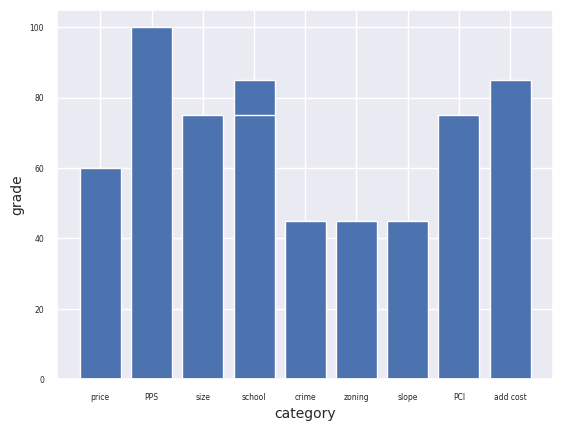

In [ ]:
Nonbinary_score_graph = [NonBinaryFeatures[0]*100,NonBinaryFeatures[1]*100,
                         NonBinaryFeatures[2]*100,NonBinaryFeatures[3]*100,
                         NonBinaryFeatures[4]*100,NonBinaryFeatures[5]*100,
                         NonBinaryFeatures[6]*100,NonBinaryFeatures[7]*100,
                         NonBinaryFeatures[8]*100,NonBinaryFeatures[9]*100]


labels = ['price', 'PPS', 'size', 'school', 'school','crime','zoning','slope', 'PCI',
          'add cost']




plt.bar(labels, Nonbinary_score_graph)


sns.set(font_scale=0.5)


plt.xlabel("category", fontsize=10)
plt.ylabel("grade", fontsize=10)




plt.show()

#**Bar graph for binary values**

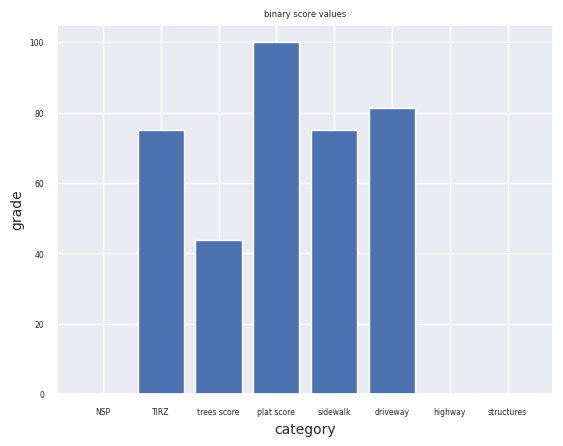

In [ ]:
weighted_binary_score_graph =[weighted_binary_score_list[0]*62.5,weighted_binary_score_list[1]*62.5,
                              weighted_binary_score_list[2]*62.5,weighted_binary_score_list[3]*62.5,
                              weighted_binary_score_list[4]*62.5,weighted_binary_score_list[5]*62.5,
                              weighted_binary_score_list[6]*62.5,weighted_binary_score_list[7]*62.5]



labels = ['NSP', 'TIRZ', 'trees score', 'plat score','sidewalk','driveway','highway', 'structures']




plt.bar(labels, weighted_binary_score_graph)


sns.set(font_scale=0.5)


plt.xlabel("category", fontsize=10)
plt.ylabel("grade", fontsize=10)
plt.title("binary score values")



plt.show()